In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


| Kolon Adı    | Açıklama                                                                                                  |
| ------------ | --------------------------------------------------------------------------------------------------------- |
| **age**      | Hastanın yaşı                                                                                             |
| **sex**      | Cinsiyet (1: Erkek, 0: Kadın)                                                                             |
| **cp**       | Göğüs ağrısı tipi (0: Tipik anjina, 1: Atipik anjina, 2: Anjinal olmayan ağrı, 3: Asemptomatik)           |
| **trestbps** | Dinlenme halindeki kan basıncı (mmHg)                                                                     |
| **chol**     | Serum kolesterol seviyesi (mg/dl)                                                                         |
| **fbs**      | Açlık kan şekeri > 120 mg/dl (1: Evet, 0: Hayır)                                                          |
| **restecg**  | Dinlenme elektrokardiyografi sonucu (0: Normal, 1: ST-T dalga anormalliği, 2: Sol ventrikül hipertrofisi) |
| **thalach**  | Maksimum kalp atış hızı                                                                                   |
| **exang**    | Egzersize bağlı göğüs ağrısı (1: Evet, 0: Hayır)                                                          |
| **oldpeak**  | Egzersiz sonrası ST segment düşüşü                                                                        |
| **slope**    | ST segment eğimi (0: Yükselen, 1: Düz, 2: Düşen)                                                          |
| **ca**       | Renkli floroskopi ile tespit edilen büyük damar sayısı (0–3)                                              |
| **thal**     | Thalassemia durumu (1: Normal, 2: Sabit defekt, 3: Tersinir defekt)                                       |
| **target**   | Kalp hastalığı durumu (1: Var, 0: Yok)                                                                    |


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
columns = df.columns

In [7]:
import math

def plot_all_histograms(df, title_prefix=""):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"{title_prefix}{col}")
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

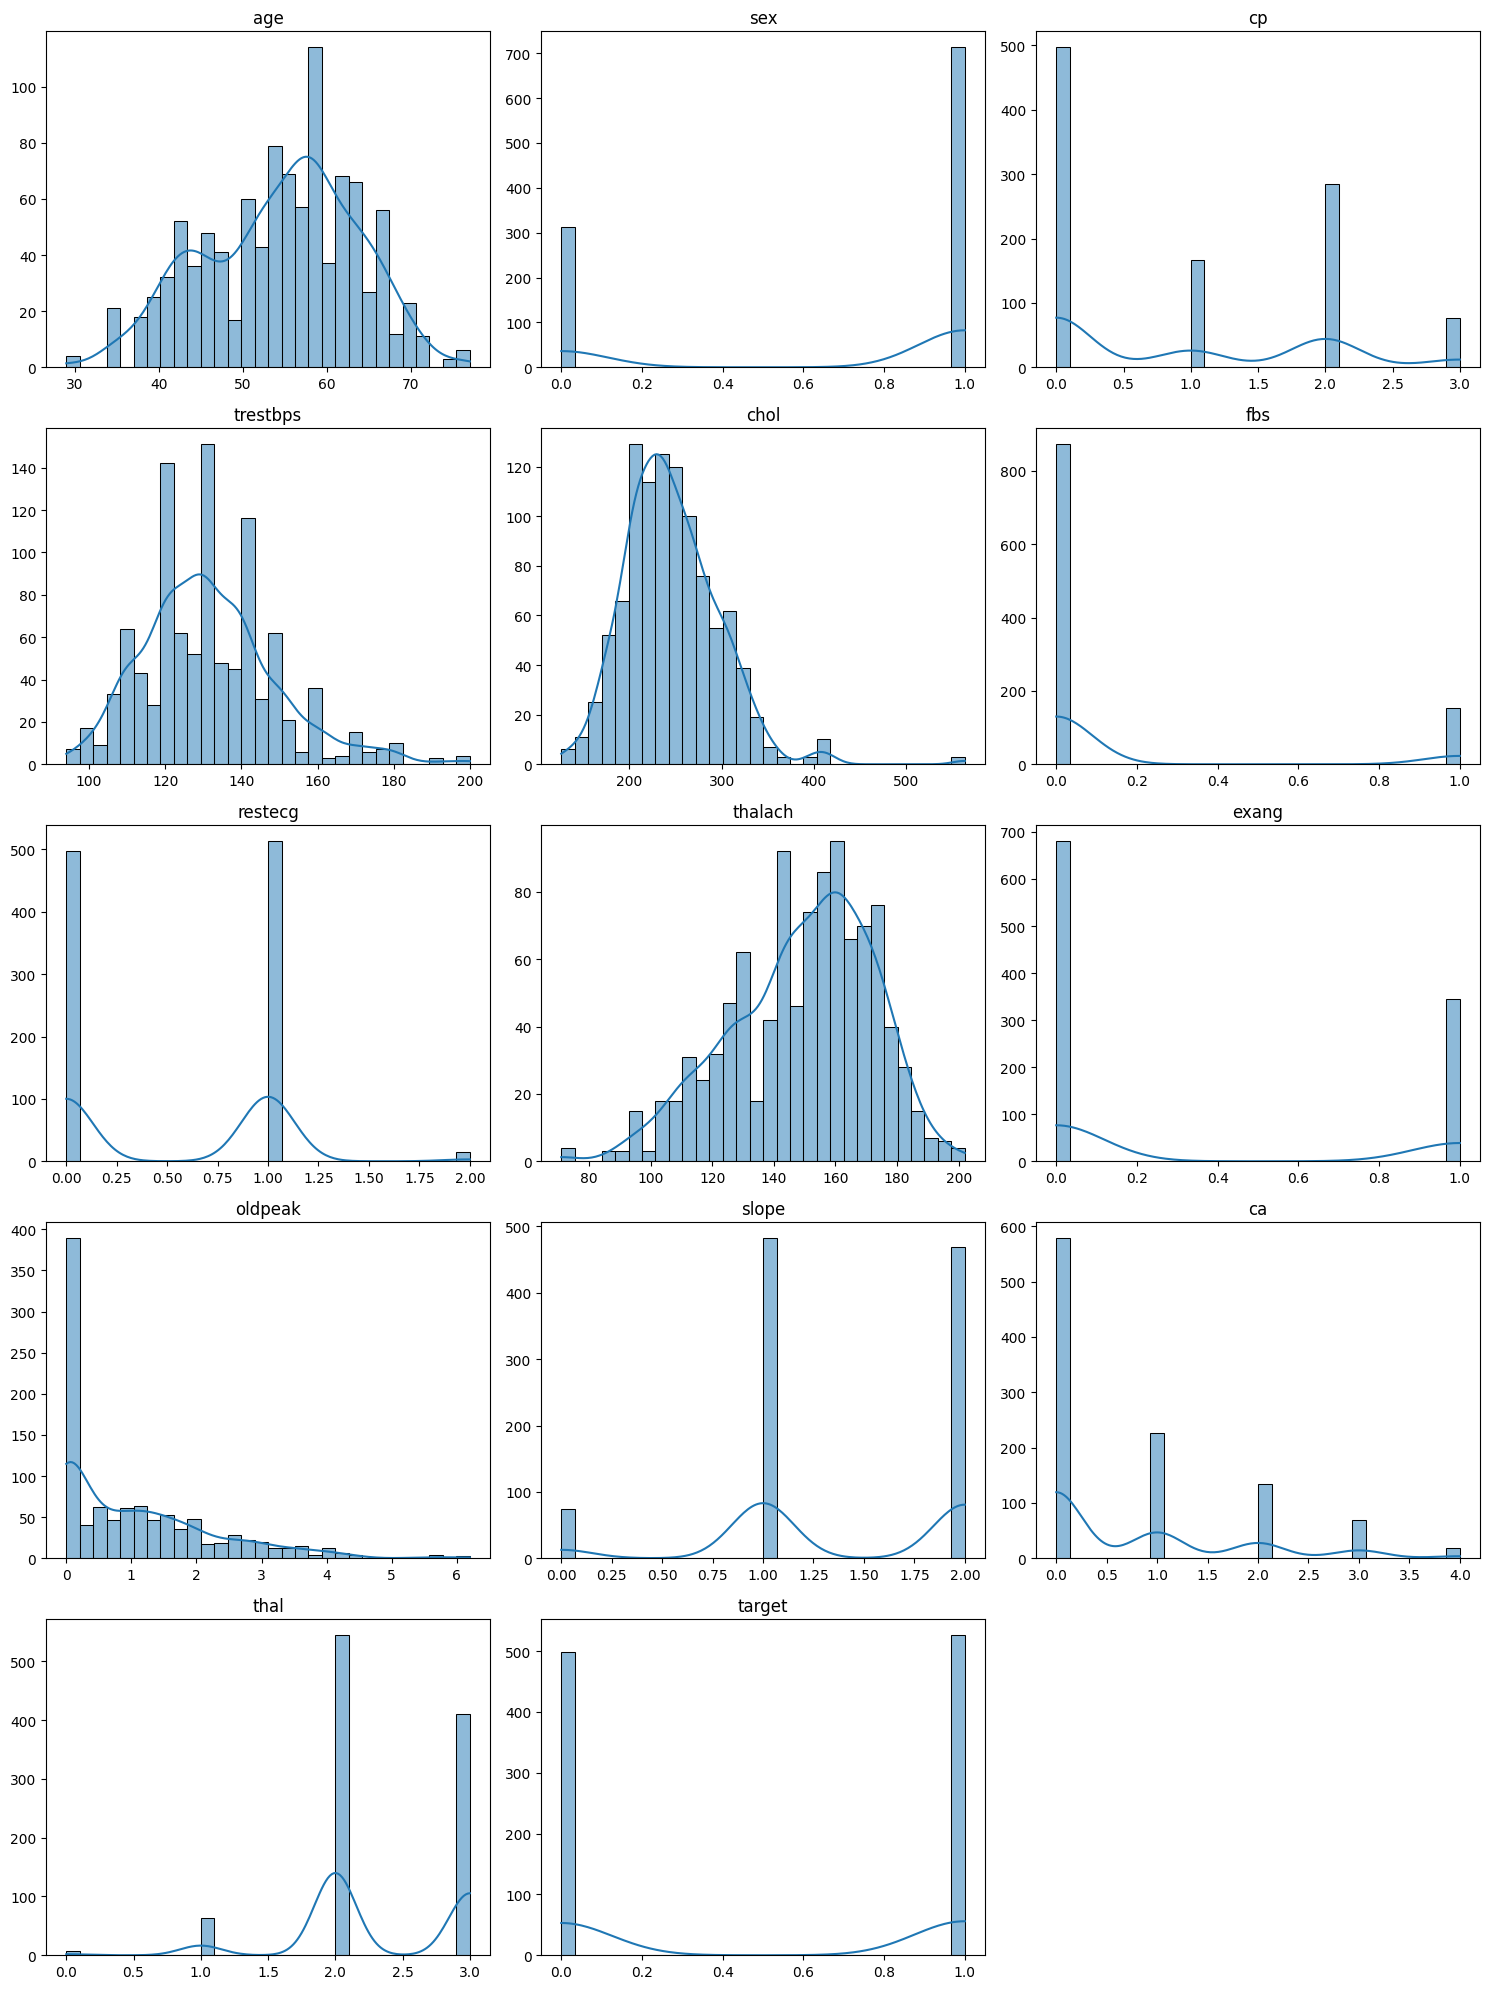

In [8]:
plot_all_histograms(df)

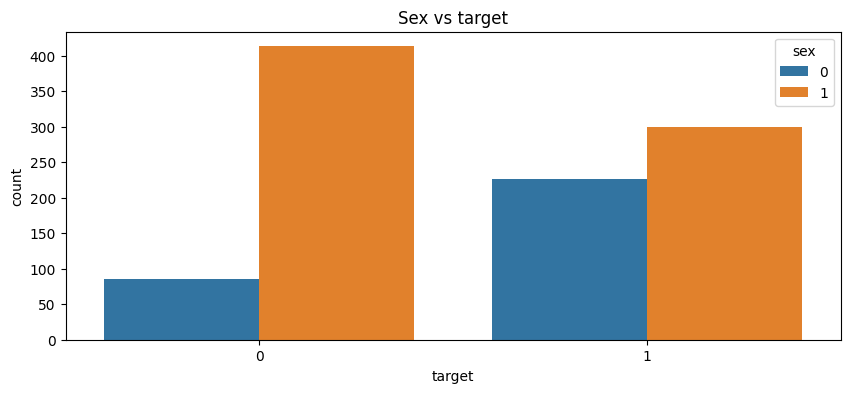

In [9]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x="target", hue="sex")
plt.title("Sex vs target")
plt.show()

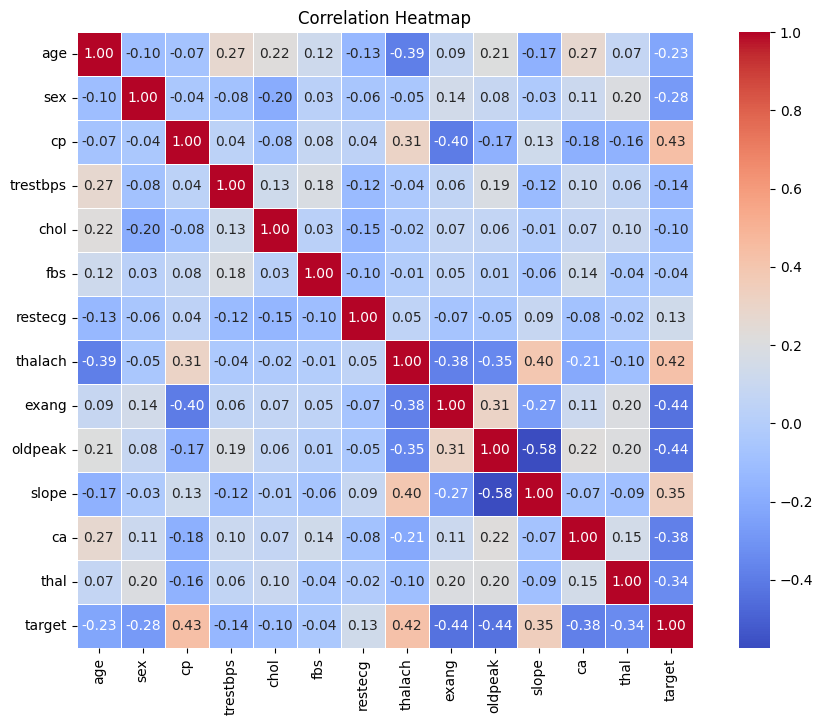

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Heatmap")
plt.show()

In [11]:
# Correlation analysis showed no significant multicollinearity among features, with correlation values mostly below 0.4.

In [12]:
X = df.drop("target", axis=1)
y = df["target"]

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [15]:
scale_cols = [
    "age",
    "trestbps",
    "chol",
    "thalach",
    "oldpeak",
    "ca" 
]

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), scale_cols)
    ],
    remainder="passthrough"
)

In [19]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Decision Tree": DecisionTreeClassifier(max_depth=4,random_state=42),
    "Random Forest": RandomForestClassifier(max_depth=6, n_estimators=200, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True)
}

In [25]:
results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ])

    pipeline.fit(X_train,y_train)
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    results[name] = {
        "train_accuracy": train_acc,
        "test_accuracy": test_acc,
    }
results_df = pd.DataFrame(results).T
print(results_df)



                     train_accuracy  test_accuracy
Logistic Regression        0.848780       0.814634
KNN                        0.879268       0.843902
Decision Tree              0.885366       0.839024
Random Forest              0.982927       0.965854
SVM                        0.909756       0.887805


In [26]:
# Stratified split ile sınıf dağılımı korundu.
# Ağaç tabanlı modellerde max depth ile overfitting azaltıldı.
# En dengeli genelleme performansı SVM modelinde elde edildi.

In [29]:
# Baseline model -> SVM 

baseline_model = {
    "SVM_C1": SVC(C=1, kernel="rbf", probability=True),
    "SVM_C5": SVC(C=5, kernel="rbf", probability=True),
    "SVM_C10": SVC(C=10, kernel="rbf", probability=True)
}

In [ ]:
svm_results = {}

for name, svm_model in baseline_model.items():
    pipeline = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", svm_model)
    ])
